In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

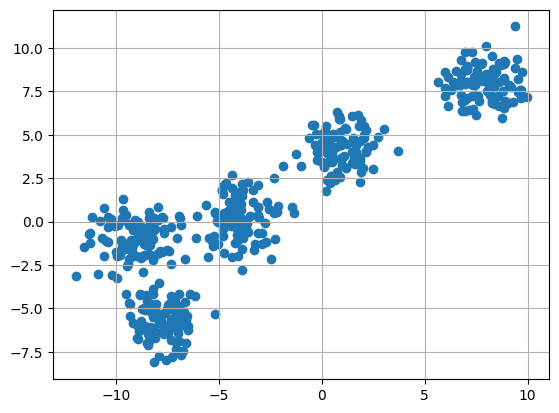

In [55]:
X,y=make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)
fig=plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [56]:
def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    np.random.seed(0)
    random_indices = np.random.permutation(data.shape[0])
    centroids = data[random_indices[:k]]
    return centroids

In [57]:
def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [58]:
def update_centroids(data, labels, k):
    """Update centroids by computing the mean of all points in each cluster."""
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [59]:
def has_converged(old_centroids, centroids, tolerance=1e-4):
    """Check if the centroids have stopped moving."""
    return np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tolerance)

In [60]:
def k_means(data, k, max_iters=300):
    """Implement K-Means clustering from scratch."""
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        
        # Check for convergence
        if has_converged(old_centroids, centroids):
            break
    return labels, centroids

In [61]:
#set the number of cluster 
k=5

In [62]:
labels, centroids = k_means(X, k)

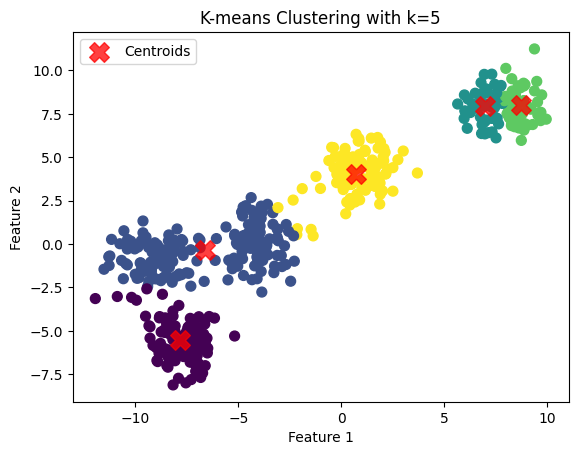

In [63]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title(f'K-means Clustering with k={k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
